# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


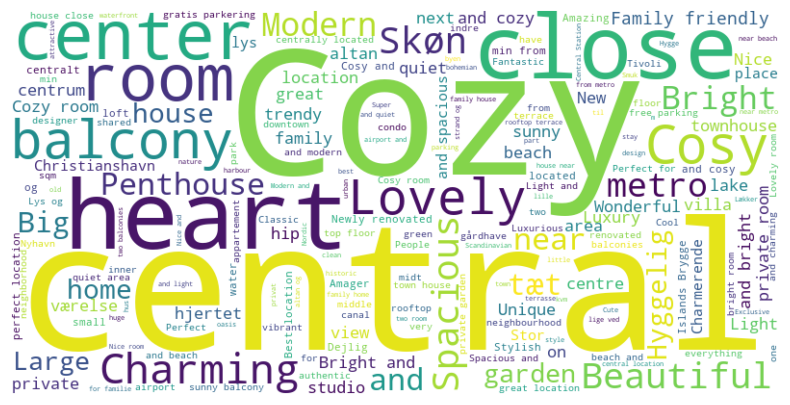

In [18]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan
data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

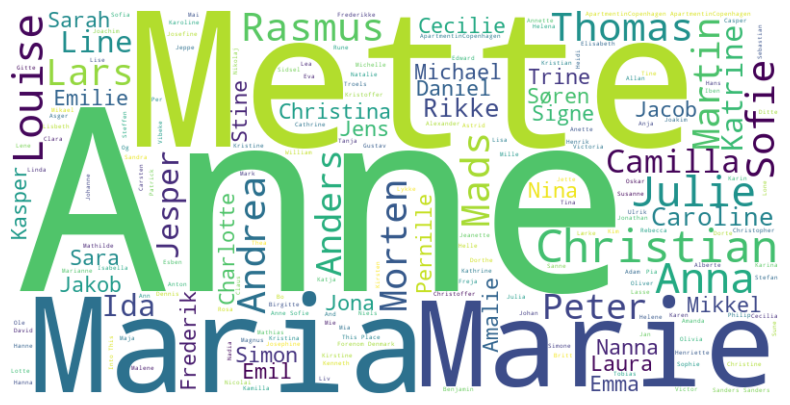

In [19]:
# State your solution here. Add more cells if needed.
import pandas as pd
data = pd.read_csv('./listings.csv')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

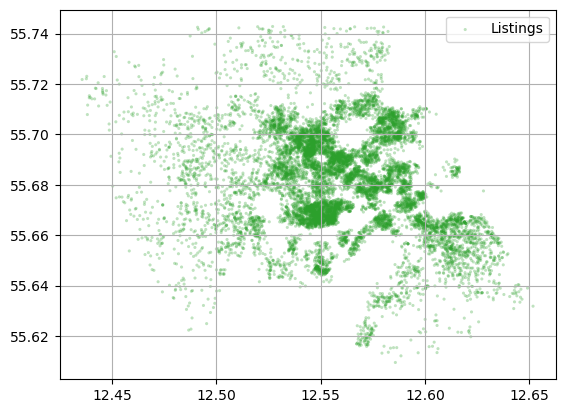

In [ ]:
# State your solution here. Add more cells if needed.
import matplotlib.pyplot as plt
import numpy as np

x = data_filtered['longitude']
y = data_filtered['latitude']

# Create a figure and axes
fig, ax = plt.subplots()

# Plot all points at once
ax.scatter(x, y, c='tab:green', s=5, label='Listings',
               alpha=0.3, edgecolors='none')

#display the Lengend of the chart
ax.legend()
#Display grid lines 
ax.grid(True)
plt.show()

#The second solution
import folium

center_map = [data_filtered["latitude"].median(), data_filtered["longitude"].median()]
map = folium.Map(location=center_map, zoom_start=12)

for _, row in data_filtered.head(200).iterrows():
    folium.Marker([row["latitude"], row['longitude']], popup=row['price']).add_to(map)
map


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

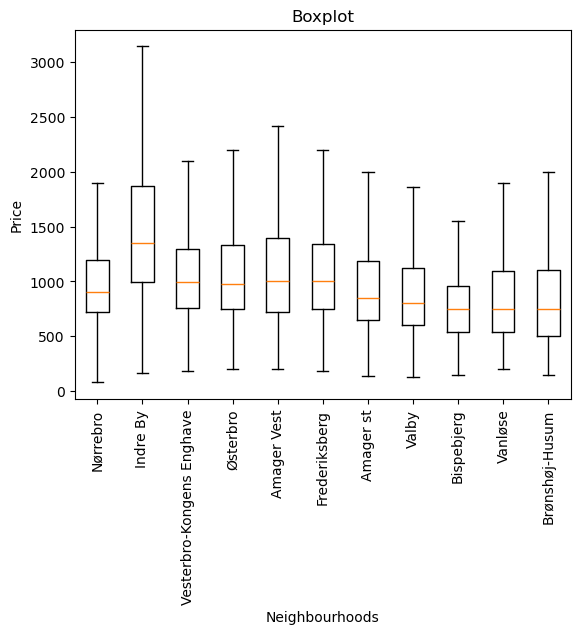

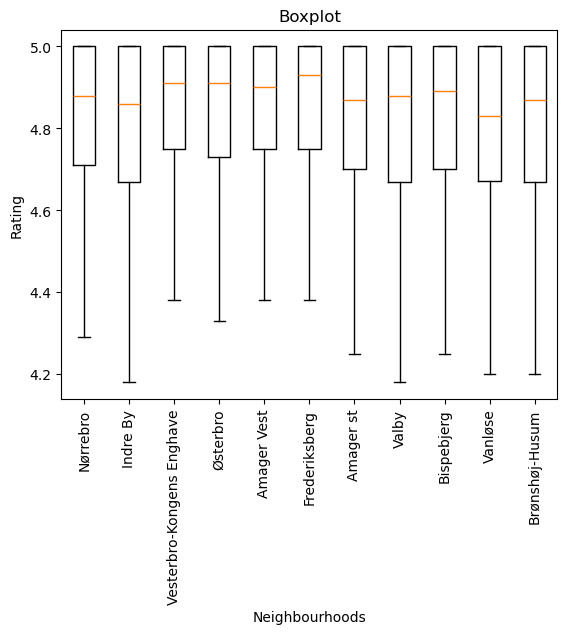

In [21]:
# State your solution here. Add more cells if needed.
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

unique_neighbourhood = data_filtered['neighbourhood_cleansed'].unique()

#Create a dictionary
neighbourhoods_prices = {}
neighbourhoods_rating = {} 

for neighbourhoods in unique_neighbourhood:
    data_for_neibourhood = data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhoods]
    prices =  data_for_neibourhood['price'].astype(int).tolist()    
    # Insert into dictionary
    neighbourhoods_prices[neighbourhoods] = prices
    rating = data_for_neibourhood['review_scores_rating'].astype(float).tolist()    
    neighbourhoods_rating[neighbourhoods] = rating
    
data = []
data_rating = [] 

for item in neighbourhoods_prices:
    data.append(neighbourhoods_prices[item])
    
for item in neighbourhoods_rating:
    data_rating.append(neighbourhoods_rating[item])
    
# Creating dataset
data_labels = list(unique_neighbourhood)

# Creates boxplots
plt.boxplot(data, tick_labels=data_labels, showfliers=False)  # Hide extreme outliers
plt.xticks(rotation=90)
plt.title('Boxplot')
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.show()

plt.boxplot(data_rating, tick_labels=data_labels, showfliers=False)  # Hide extreme outliers
plt.xticks(rotation=90)
plt.title('Boxplot')
plt.xlabel('Neighbourhoods')
plt.ylabel('Rating')
plt.show()


### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [22]:
# State your solution here. Add more cells if needed.
grouped = data_filtered.groupby(['neighbourhood_cleansed','room_type'])

""" The mode and quartiles are not imcluded"""
stats = grouped["price"].agg(["mean", "median", "std", "var", "min", "max", "count"]) 

""" Compute MOde (Most Frequent Value) """
mode_values = grouped['price'].agg(lambda x:x.mode().iloc[0])
mode_values.name = 'mode'

#Compute quartiles
quartiles = grouped['price'].quantile([0.25,0.5,0.75]).unstack()
quartiles.columns = ["Q1 (25%)", "Q2 (Median)", "Q3 (75%)"]

final_summary = stats.join([mode_values,quartiles])
display(final_summary)

mean  median          std  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt  1234.226623  1050.0   832.696891   
                          Private room     1032.966216   500.0  5299.018095   
                          Shared room      1051.500000  1051.5   112.429978   
Amager st                 Entire home/apt  1093.584071   900.0   721.982284   
                          Hotel room       1296.000000  1201.0   211.184753   
                          Private room      549.325581   471.0   293.995992   
                          Shared room      2575.000000  2575.0          NaN   
Bispebjerg                Entire home/apt   992.592520   800.0  1981.580545   
                          Private room      488.978947   400.0   353.674089   
                          Shared room       198.000000   198.0          NaN   
Brønshøj-Husum            Entire home/apt  1014.995370   900.0   555.669548   
                          Private room      445.552239   400.0   201.631624   
                          Shared room       211.500000   211.5    16.263456   
Frederiksberg             Entire home/apt  1292.472222  1037.0  1958.802772   
                          Private room      621.706767   500.0   567.611220   
Indre By                  Entire home/apt  1642.387192  1400.0  1072.616232   
                          Hotel room       1077.200000  1306.0   654.255098   
                          Private room      698.984375   582.0   380.070466   
                          Shared room       292.000000   280.0    67.577116   
Nørrebro                  Entire home/apt  1047.742192   950.0   583.703218   
                          Private room      650.121212   500.0   760.270040   
                          Shared room       324.666667   400.0   130.481161   
Valby                     Entire home/apt  1017.968889   899.0   635.434691   
                          Private room      498.157303   438.0   288.616366   
Vanløse                   Entire home/apt   954.425197   826.5   496.658320   
                          Private room      413.409091   337.5   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1181.435119  1000.0   698.122481   
                          Private room      574.366516   500.0   295.726896   
                          Shared room       330.500000   330.5   113.844192   
Østerbro                  Entire home/apt  1248.551107  1000.0  1438.908216   
                          Private room      605.461538   500.0   437.259030   
                          Shared room       469.000000   469.0          NaN   

                                                    var     min      max  \
neighbourhood_cleansed    room_type                                        
Amager Vest               Entire home/apt  6.933841e+05   250.0  14000.0   
                          Private room     2.807959e+07   200.0  64900.0   
                          Shared room      1.264050e+04   972.0   1131.0   
Amager st                 Entire home/apt  5.212584e+05   240.0  10000.0   
                          Hotel room       4.459900e+04  1149.0   1538.0   
                          Private room     8.643364e+04   135.0   2000.0   
                          Shared room               NaN  2575.0   2575.0   
Bispebjerg                Entire home/apt  3.926661e+06   235.0  44000.0   
                          Private room     1.250854e+05   143.0   3000.0   
                          Shared room               NaN   198.0    198.0   
Brønshøj-Husum            Entire home/apt  3.087686e+05   250.0   4462.0   
                          Private room     4.065531e+04   145.0   1200.0   
                          Shared room      2.645000e+02   200.0    223.0   
Frederiksberg             Entire home/apt  3.836908e+06   300.0  58000.0   
                          Private room     3.221825e+05   185.0   5000.0   
Indre By                  Entire home/apt  1.150506e+06   350.0  20000.

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [23]:
# State your solution here. Add more cells if needed.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = data_filtered.drop(['id','neighbourhood_cleansed','price_category','price','host_id','host_name','room_type', 'name', 'latitude', 'longitude', 'last_review'], axis='columns')

room_type_table = pd.get_dummies(data_filtered[['room_type']],drop_first=True)
neibourhood_table = pd.get_dummies(data_filtered[['neighbourhood_cleansed']],drop_first=True)
# Drop 'neighbourhood_cleansed' from original data
#data = data.drop(columns=['neighbourhood_cleansed'])
# Target variable: Price Category (0 = Affordable, 1 = Expensive)
y = data_filtered['price_category']
# Concatenate One-Hot Encoded 'x' with 'data'
x = pd.concat([data, neibourhood_table,room_type_table], axis=1)
display(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Define the range of hyperparameters to test
neighbors_range = range(11, 31)  # Number of neighbors from 3 to 19
distance_metrics = ['euclidean', 'manhattan', 'minkowski']  # Common distance metrics, only illustration, doesn't make sense!

# Variables to store the best parameters and highest accuracy
best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

# Nested loop to iterate over the hyperparameters
for n_neighbors in neighbors_range:
    for metric in distance_metrics:
         # Initialize the KNN model with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        
        # Train the model
        knn.fit(x_train,y_train)

        #Predict on test
        prediction = knn.predict(x_test)

        #Compute accuracy
        accuracy = accuracy_score(y_test,prediction)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric
            
            
print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")


,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,...,neighbourhood_cleansed_Frederiksberg,neighbourhood_cleansed_Indre By,neighbourhood_cleansed_Nørrebro,neighbourhood_cleansed_Valby,neighbourhood_cleansed_Vanløse,neighbourhood_cleansed_Vesterbro-Kongens Enghave,neighbourhood_cleansed_Østerbro,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,...,False,False,True,False,False,False,False,False,False,False
1,4,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,...,False,True,False,False,False,False,False,False,False,False
2,3,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,...,False,True,False,False,False,False,False,False,False,False
3,7,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,...,False,False,False,False,False,True,False,False,False,False
4,3,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,6,4,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,...,False,False,False,False,False,False,False,False,False,False
13809,2,4,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,...,False,False,False,False,False,False,False,False,False,False
13811,3,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,...,False,False,False,True,False,False,False,False,False,False
13812,1,3,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,...,False,False,False,True,False,False,False,False,False,False


Best parameters: Number of Neighbors - 19, Distance Metric - manhattan
Highest Accuracy: 62.90%
